In [ ]:
!pip install pandas_ta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from datetime import date, timedelta


data = yf.download(tickers = '^CNXAUTO', start = date.today() - timedelta(days=10*365), end = date.today())

NSEI_data = yf.download(tickers = '^NSEI', start = date.today() - timedelta(days=10*365), end = date.today())

data.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-28,6438.049805,6442.350098,6354.350098,6374.750000,6374.750000,0
2014-05-29,6361.850098,6419.950195,6343.299805,6375.250000,6375.250000,0
2014-05-30,6340.200195,6424.350098,6303.600098,6385.100098,6385.100098,0
2014-06-02,6391.100098,6494.899902,6373.000000,6470.549805,6470.549805,0
2014-06-03,6475.799805,6525.899902,6454.799805,6509.299805,6509.299805,0
2014-06-04,6534.350098,6611.299805,6526.500000,6558.350098,6558.350098,0
2014-06-05,6576.799805,6638.350098,6515.250000,6618.250000,6618.250000,0
2014-06-06,6651.100098,6735.700195,6615.750000,6724.899902,6724.899902,0
2014-06-09,6754.750000,6856.700195,6746.200195,6832.649902,6832.649902,0


In [ ]:
#to improve stationarity, we can take log of closing price

data['Close']=np.log(data['Close'])

NSEI_data['Close']=np.log(NSEI_data['Close'])

data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-28,6438.049805,6442.350098,6354.350098,8.760100,6374.750000,0
2014-05-29,6361.850098,6419.950195,6343.299805,8.760179,6375.250000,0
2014-05-30,6340.200195,6424.350098,6303.600098,8.761722,6385.100098,0
2014-06-02,6391.100098,6494.899902,6373.000000,8.775016,6470.549805,0
2014-06-03,6475.799805,6525.899902,6454.799805,8.780987,6509.299805,0
2014-06-04,6534.350098,6611.299805,6526.500000,8.788494,6558.350098,0
2014-06-05,6576.799805,6638.350098,6515.250000,8.797586,6618.250000,0
2014-06-06,6651.100098,6735.700195,6615.750000,8.813572,6724.899902,0
2014-06-09,6754.750000,6856.700195,6746.200195,8.829468,6832.649902,0


In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

#to assess direction of returns
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)


#introducing target classes which show movement of either up or down
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


#for calculating returns
data['close_t-1'] = data['Adj Close'].shift(-1)
data['returns'] = data['Adj Close']/data['close_t-1'] - 1

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date', 'Open', 'High', 'Low', 'close_t-1', 'Target'], axis=1, inplace=True)

In [ ]:
# Adding indicators
NSEI_data['RSI']=ta.rsi(NSEI_data.Close, length=15)
NSEI_data['EMAF']=ta.ema(NSEI_data.Close, length=20)
NSEI_data['EMAM']=ta.ema(NSEI_data.Close, length=100)
NSEI_data['EMAS']=ta.ema(NSEI_data.Close, length=150)

#to assess direction of returns
NSEI_data['Target'] = NSEI_data['Adj Close']-NSEI_data.Open
NSEI_data['Target'] = NSEI_data['Target'].shift(-1)


#introducing target classes which show movement of either up or down
NSEI_data['TargetClass'] = [1 if NSEI_data.Target[i]>0 else 0 for i in range(len(NSEI_data))]


#for calculating returns
NSEI_data['close_t-1'] = NSEI_data['Adj Close'].shift(-1)
NSEI_data['returns'] = NSEI_data['Adj Close']/NSEI_data['close_t-1'] - 1

NSEI_data.dropna(inplace=True)
NSEI_data.drop(['Volume', 'Close', 'Open', 'High', 'Low', 'close_t-1', 'Target'], axis=1, inplace=True)

In [ ]:
#Log of Adj Close

data['Adj Close']=np.log(data['Adj Close'])
NSEI_data['Adj Close']=np.log(NSEI_data['Adj Close'])

In [ ]:
data_set = data.iloc[:, 0:7]#.values
NSEI_data_set = NSEI_data.iloc[:, 0:7]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Adj Close,RSI,EMAF,EMAM,EMAS,TargetClass,returns
0,9.035665,54.996892,9.024325,8.975088,8.934554,0,0.000036
1,9.035630,54.981704,9.025401,8.976287,8.935893,1,-0.001492
2,9.037123,55.532067,9.026518,8.977491,8.937234,0,0.001280
3,9.035844,54.915973,9.027406,8.978647,8.938540,1,-0.003429
4,9.039279,56.310636,9.028537,8.979847,8.939874,1,-0.021707
5,9.061225,63.945294,9.031650,8.981459,8.941481,1,-0.001032
6,9.062258,64.260119,9.034565,8.983059,8.943081,1,-0.008200
7,9.070492,66.741494,9.037987,8.984790,8.944769,1,-0.007533
8,9.078054,68.868287,9.041802,8.986637,8.946534,0,-0.002170
9,9.080226,69.469127,9.045462,8.988490,8.948305,1,-0.007018


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

#do the same for Nifty data
sc = StandardScaler()
NSEI_data_set_scaled = sc.fit_transform(NSEI_data_set)

[[-0.6987258   0.12777821 -0.74470608 ... -1.14572773 -0.90119626
   0.02795724]
 [-0.69885851  0.12656391 -0.7405972  ... -1.1397922   1.10963621
  -0.08077912]
 [-0.6933071   0.17056663 -0.73633685 ... -1.13384758 -0.90119626
   0.11649875]
 ...
 [ 3.10339379  1.21027048  3.06491658 ...  3.01560643 -0.90119626
   0.11587889]
 [ 3.09867137  1.15630616  3.07750922 ...  3.02641781  1.10963621
  -1.54152004]
 [ 3.18143697  1.55733265  3.096995   ...  3.03839352  1.10963621
  -0.10027454]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(5):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2296
[[[-0.6987258   0.12777821 -0.74470608 -0.96013848 -1.14572773]
  [-0.69885851  0.12656391 -0.7405972  -0.95508806 -1.1397922 ]
  [-0.6933071   0.17056663 -0.73633685 -0.95001306 -1.13384758]
  ...
  [-0.48893742  0.43141859 -0.5693251  -0.78751837 -0.96001494]
  [-0.49446374  0.38504298 -0.56193439 -0.7812992  -0.95331018]
  [-0.49320696  0.39305458 -0.55512468 -0.77517497 -0.94667437]]

 [[-0.69885851  0.12656391 -0.7405972  -0.95508806 -1.1397922 ]
  [-0.6933071   0.17056663 -0.73633685 -0.95001306 -1.13384758]
  [-0.69806186  0.12130856 -0.73294715 -0.94514526 -1.12805682]
  ...
  [-0.49446374  0.38504298 -0.56193439 -0.7812992  -0.95331018]
  [-0.49320696  0.39305458 -0.55512468 -0.77517497 -0.94667437]
  [-0.52285415  0.1266106  -0.55186227 -0.76983735 -0.94059481]]

 [[-0.6933071   0.17056663 -0.73633685 -0.95001306 -1.13384758]
  [-0.69806186  0.12130856 -0.73294715 -0.94514526 -1.12805682]
  [-0.68529291  0.23281487 -0.72863178 -0.9400873  -1.12214103]
  ...
  [-0.4932069

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

#also for the nifty data
NSEI_y = NSEI_data_set_scaled[:, 6]
NSEI_ret = NSEI_y[splitlimit:]

1812
(1812, 30, 5)
(454, 30, 5)
(1812, 1)
(454, 1)
[[ 0.23984901]
 [-0.00375366]
 [ 1.18333403]
 ...
 [-0.71741378]
 [ 0.87853936]
 [ 0.07246768]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 5), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(75, name='dense_layer1')(inputs)
inputs = Dense(1, name='dense_layer2')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
109/109 [==============================] - 14s 85ms/step - loss: 1.1587 - val_loss: 1.2658
Epoch 2/30
109/109 [==============================] - 6s 58ms/step - loss: 1.1388 - val_loss: 1.2807
Epoch 3/30
109/109 [==============================] - 9s 80ms/step - loss: 1.1284 - val_loss: 1.2828
Epoch 4/30
109/109 [==============================] - 6s 54ms/step - loss: 1.1315 - val_loss: 1.2854
Epoch 5/30
109/109 [==============================] - 5s 41ms/step - loss: 1.1277 - val_loss: 1.2912
Epoch 6/30
109/109 [==============================] - 4s 34ms/step - loss: 1.1251 - val_loss: 1.2807
Epoch 7/30
109/109 [==============================] - 3s 30ms/step - loss: 1.1153 - val_loss: 1.2989
Epoch 8/30
109/109 [==============================] - 3s 31ms/step - loss: 1.1286 - val_loss: 1.2909
Epoch 9/30
109/109 [==============================] - 5s 46ms/step - loss: 1.1235 - val_loss: 1.2866
Epoch 10/30
109/109 [==============================] - 3s 31ms/step - loss: 1.1174 - val_l

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 29ms/step
[0.13528115] [-0.06826939]
[0.09102254] [-1.39272506]
[0.06746431] [-0.24440339]
[0.0874418] [-0.71349873]
[0.13238522] [0.18240157]
[0.17320807] [-0.37079048]
[0.18271072] [-0.27225995]
[0.16983423] [1.23112852]
[0.15798265] [0.87866645]
[0.11245079] [-0.26236952]


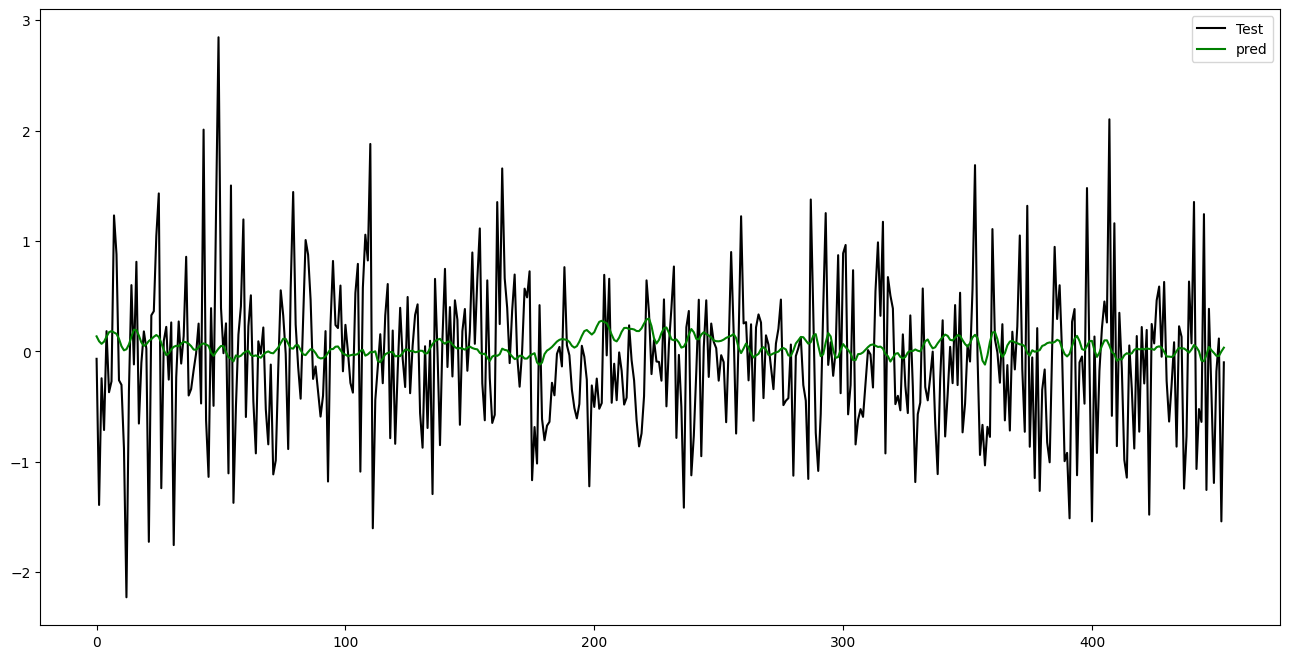

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

Now for Nifty 50 Data

In [ ]:
data = yf.download(tickers = '^NSEI', start = date.today() - timedelta(days=2*365), end = date.today())
data = data[:len(y_pred)] #to make it the same length as y_pred

data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-26,16105.000000,16204.450195,15903.700195,16170.150391,16170.150391,314300
2022-05-27,16296.599609,16370.599609,16221.950195,16352.450195,16352.450195,274100
2022-05-30,16527.900391,16695.500000,16506.150391,16661.400391,16661.400391,251400
2022-05-31,16578.449219,16690.750000,16521.900391,16584.550781,16584.550781,651600
2022-06-01,16594.400391,16649.199219,16438.849609,16522.750000,16522.750000,249600
2022-06-02,16481.650391,16646.400391,16443.050781,16628.000000,16628.000000,236000
2022-06-03,16761.650391,16793.849609,16567.900391,16584.300781,16584.300781,245500
2022-06-06,16530.699219,16610.949219,16444.550781,16569.550781,16569.550781,233600
2022-06-07,16469.599609,16487.250000,16347.099609,16416.349609,16416.349609,233800


In [ ]:
# Convert the arrays to DataFrames
array1_df = pd.DataFrame(y_pred, columns=['Sector Stock'])
array2_df = pd.DataFrame(NSEI_ret[:len(y_pred)], columns=['Nifty 50'])

# Ensure the indices are aligned
array1_df.index = data.index
array2_df.index = data.index

# Concatenate the DataFrame and the new array DataFrames
returns_df = pd.concat([data, array1_df, array2_df], axis=1)


In [ ]:
returns_df.drop(['Volume', 'Close', 'Open', 'High', 'Low', 'Adj Close'], axis=1, inplace=True)
returns_df.head(10)

,Sector Stock,Nifty 50
Date,,
2022-05-26,0.135281,-1.009713
2022-05-27,0.091023,-1.703507
2022-05-30,0.067464,0.471000
2022-05-31,0.087442,0.387173
2022-06-01,0.132385,-0.557628
2022-06-02,0.173208,0.283464
2022-06-03,0.182711,0.119762
2022-06-06,0.169834,0.911821
2022-06-07,0.157983,0.380987


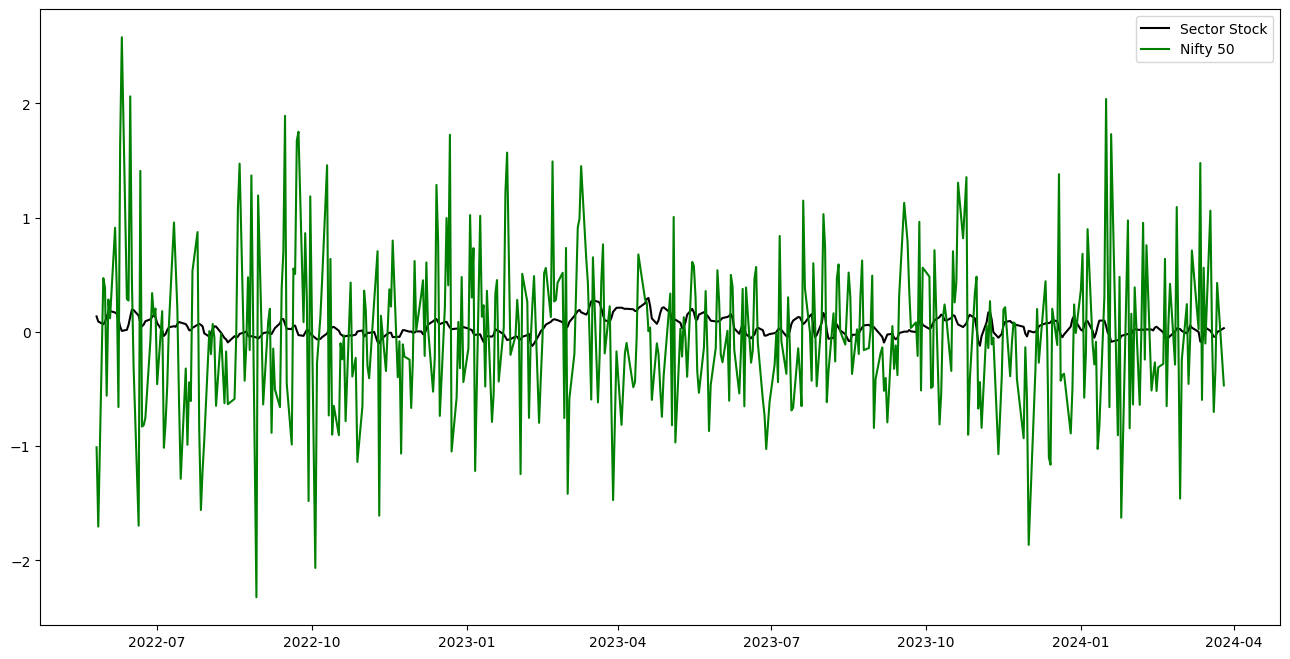

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(returns_df['Sector Stock'], color = 'black', label = 'Sector Stock')
plt.plot(returns_df['Nifty 50'], color = 'green', label = 'Nifty 50')
plt.legend()
plt.show()

Now to compare the two

In [ ]:
# Calculate cumulative returns
cumulative_returns_sector_stock = (1 + returns_df['Sector Stock']).cumprod() - 1
cumulative_returns_nifty50 = (1 + returns_df['Nifty 50']).cumprod() - 1

# Calculate average annual return
annual_return_sector_stock = returns_df['Sector Stock'].mean() * len(y_pred)
annual_return_nifty50 = returns_df['Nifty 50'].mean() * len(y_pred)

# Calculate volatility (standard deviation of returns)
volatility_sector_stock = returns_df['Sector Stock'].std() * np.sqrt(len(y_pred))
volatility_nifty50 = returns_df['Nifty 50'].std() * np.sqrt(len(y_pred))

# Calculate Sharpe Ratio (assuming risk-free rate of 0%)
sharpe_ratio_sector_stock = annual_return_sector_stock / volatility_sector_stock
sharpe_ratio_nifty50 = annual_return_nifty50 / volatility_nifty50

In [ ]:
# Print results
print(f"Cumulative Return for Sector Stock: {cumulative_returns_sector_stock[-1]:.2%}")
print(f"Cumulative Return for Nifty 50: {cumulative_returns_nifty50[-1]:.2%}")
print(f"Average Annual Return for Sector Stock: {annual_return_sector_stock:.2%}")
print(f"Average Annual Return for Nifty 50: {annual_return_nifty50:.2%}")
print(f"Volatility for Sector Stock: {volatility_sector_stock:.2%}")
print(f"Volatility for Nifty 50: {volatility_nifty50:.2%}")
print(f"Sharpe Ratio for Sector Stock: {sharpe_ratio_sector_stock:.2f}")
print(f"Sharpe Ratio for Nifty 50: {sharpe_ratio_nifty50:.2f}")

Cumulative Return for Sector Stock: 3292842800.00%
Cumulative Return for Nifty 50: -100.00%
Average Annual Return for Sector Stock: 1893.28%
Average Annual Return for Nifty 50: -1180.40%
Volatility for Sector Stock: 166.09%
Volatility for Nifty 50: 1466.92%
Sharpe Ratio for Sector Stock: 11.40
Sharpe Ratio for Nifty 50: -0.80


In [ ]:
# Determine which stock is performing better based on the Sharpe Ratio
better_stock = 'Sector Stock' if sharpe_ratio_sector_stock > sharpe_ratio_nifty50 else 'Nifty 50'
print(f"The better performing stock based on Sharpe Ratio is: {better_stock}")

The better performing stock based on Sharpe Ratio is: Sector Stock


If one pays close attention to the above code, and analysis, it will appear rather unappetizing to see how different our predicted results are faring compared to the actual returns.

It is to be kept in mind that, unline in the other methods where we train according to prices as inputs and prices as outputs, yield an attractive result which is not necessarily correct.

Here, we are training with logarithmized prices and moving averages as inputs and returns as our output to better assess the direction of stock movement.

With a better trained and better evaluated model, it is clear that we will be able to get more accurate returns for the desired stock.

At the end of the day, what matters most to investors is the direction of returns (of course amount of return is also a highly sought out value) as it gives the investor an idea of what position they desire to hold for that stock.

Improving predictability of a stock or the whole portfolio using our models, to analyse direction of returns, will prove to be most beneficial for the investor.